In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('creditcard.csv', sep=',')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
def roc_out(y_test,y_pred_test):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr,'k--', lw=1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    roc_auc_score(y_test,y_pred_test)

In [4]:
param_grid = { 
    'n_estimators': [50,110,170,230 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1), df.Class, test_size=0.3, random_state=42)

In [5]:
from sklearn.model_selection import GridSearchCV
clf=RandomForestClassifier(n_estimators=60,max_features='auto',max_depth=9,criterion='entropy',n_jobs=-1)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
y_pred_test=clf.predict(X_test)
y_pred_train=clf.predict(X_train)

In [15]:
y_pred_test_score=clf.score(X_test,y_test)

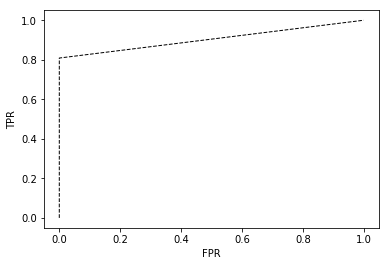

In [18]:
from sklearn.metrics import roc_curve
roc_curve(y_test,y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,'k--', lw=1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [19]:
thresholds

array([2, 1, 0])

In [7]:
print(classification_report(y_test,y_pred_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.94      0.83      0.88       136

avg / total       1.00      1.00      1.00     85443



In [8]:
print(classification_report(y_train,y_pred_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199008
          1       1.00      0.83      0.91       356

avg / total       1.00      1.00      1.00    199364



In [9]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_test)

0.91540014818451565

In [10]:
roc_auc_score(y_train,y_pred_train)

0.9171348314606742

In [11]:
y_pred_test[y_pred_test!=y_test].sum()

7

In [12]:
y_pred_train[y_pred_train!=y_train].sum()

0

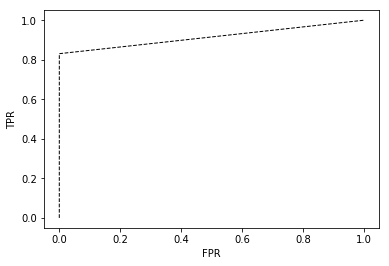

In [13]:
roc_out(y_test,y_pred_test)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_pred_train)

array([[199008,      0],
       [    59,    297]])

In [15]:
confusion_matrix(y_test,y_pred_test)

array([[85300,     7],
       [   23,   113]])

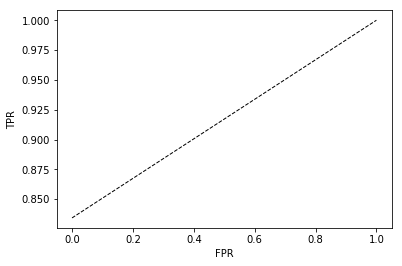

In [16]:
roc_out(y_train,y_pred_train)

In [17]:
import matplotlib.animation as ani


In [32]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=150,max_features=9,max_samples=5500,bootstrap=True,contamination=0.001,n_jobs=-1)
clf.fit(X_train)

IsolationForest(bootstrap=True, contamination=0.001, max_features=9,
        max_samples=5500, n_estimators=150, n_jobs=-1, random_state=None,
        verbose=0)

In [33]:
if_y_pred_train=clf.predict(X_train)
if_y_pred_test=clf.predict(X_test)

In [44]:
lr_y_pred_train[lr_y_pred_train==1]=0
lr_y_pred_train[lr_y_pred_train==-1]=1
lr_y_pred_test[lr_y_pred_test==1]=0
lr_y_pred_test[lr_y_pred_test==-1]=1

In [29]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
clf.fit(X_train,y_train)
lr_y_pred_train=clf.predict(X_train)
lr_y_pred_test=clf.predict(X_test)

In [30]:
print(classification_report(y_test,lr_y_pred_test))
print(confusion_matrix(y_test,lr_y_pred_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.69      0.60      0.65       136

avg / total       1.00      1.00      1.00     85443

[[85271    36]
 [   54    82]]


In [31]:
print(classification_report(y_train,lr_y_pred_train))
print(confusion_matrix(y_train,lr_y_pred_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199008
          1       0.74      0.63      0.68       356

avg / total       1.00      1.00      1.00    199364

[[198930     78]
 [   133    223]]


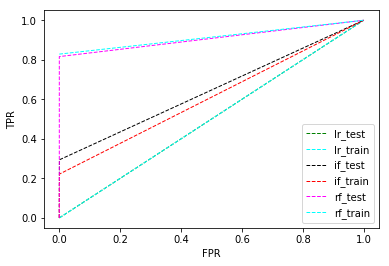

In [56]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
lr_fpr_train,lr_tpr_train, if_thresholds_train=roc_curve(y_train,lr_y_pred_train,pos_label=1)
lr_fpr_test, lr_tpr_test, thresholds = roc_curve(y_test,lr_y_pred_test,pos_label=1)
plt.plot(lr_fpr_test,lr_tpr_test,'k--', lw=1,color='green',label='lr_test')
plt.plot(lr_fpr_train,lr_tpr_train,'k--', lw=1,color='aqua',label='lr_train')
if_fpr_train,if_tpr_train, if_thresholds_train=roc_curve(y_train,if_y_pred_train,pos_label=1)
if_fpr_test, if_tpr_test, thresholds = roc_curve(y_test,if_y_pred_test,pos_label=1)
plt.plot(if_fpr_test,if_tpr_test,'k--', lw=1,color='black',label='if_test')
plt.plot(if_fpr_train,if_tpr_train,'k--', lw=1,color='red',label='if_train')
rf_fpr_train,rf_tpr_train, rf_thresholds_train=roc_curve(y_train,y_pred_train,pos_label=1)
rf_fpr_test, rf_tpr_test, thresholds = roc_curve(y_test,y_pred_test,pos_label=1)
plt.plot(rf_fpr_test,rf_tpr_test,'k--', lw=1,color='magenta',label='rf_test')
plt.plot(rf_fpr_train,rf_tpr_train,'k--', lw=1,color='cyan',label='rf_train')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.savefig("ABC.png")
plt.show()
